# Creating Model Directory and Compile BBGC-Muso v6.2

This set of Jupyter Notebooks is designed to guide users step-by-step through the process of employing [Biome-BGC Muso](http://nimbus.elte.hu/bbgc/index.html), a single-patch terrestrial biogeochemical model, across large geographic areas with the help of GIS data. Remotely sensed digital elevation models (DEM), national land cover database (NLCD) data, SSURGO soil data, and Daymet modelled meteorological data all are used to simulate the BGC cycle of an area of interest defined by the user. Doing so predicts carbon, nutrient, and water fluxes and stocks through time at high spatio-temporal resolution. This model can be used across multiple biomes/land uses and temporally-varying land uses (i.e. large reforestation projects).

Below is a process diagram schematic visualizing the steps taken throughout this set of notebooks.

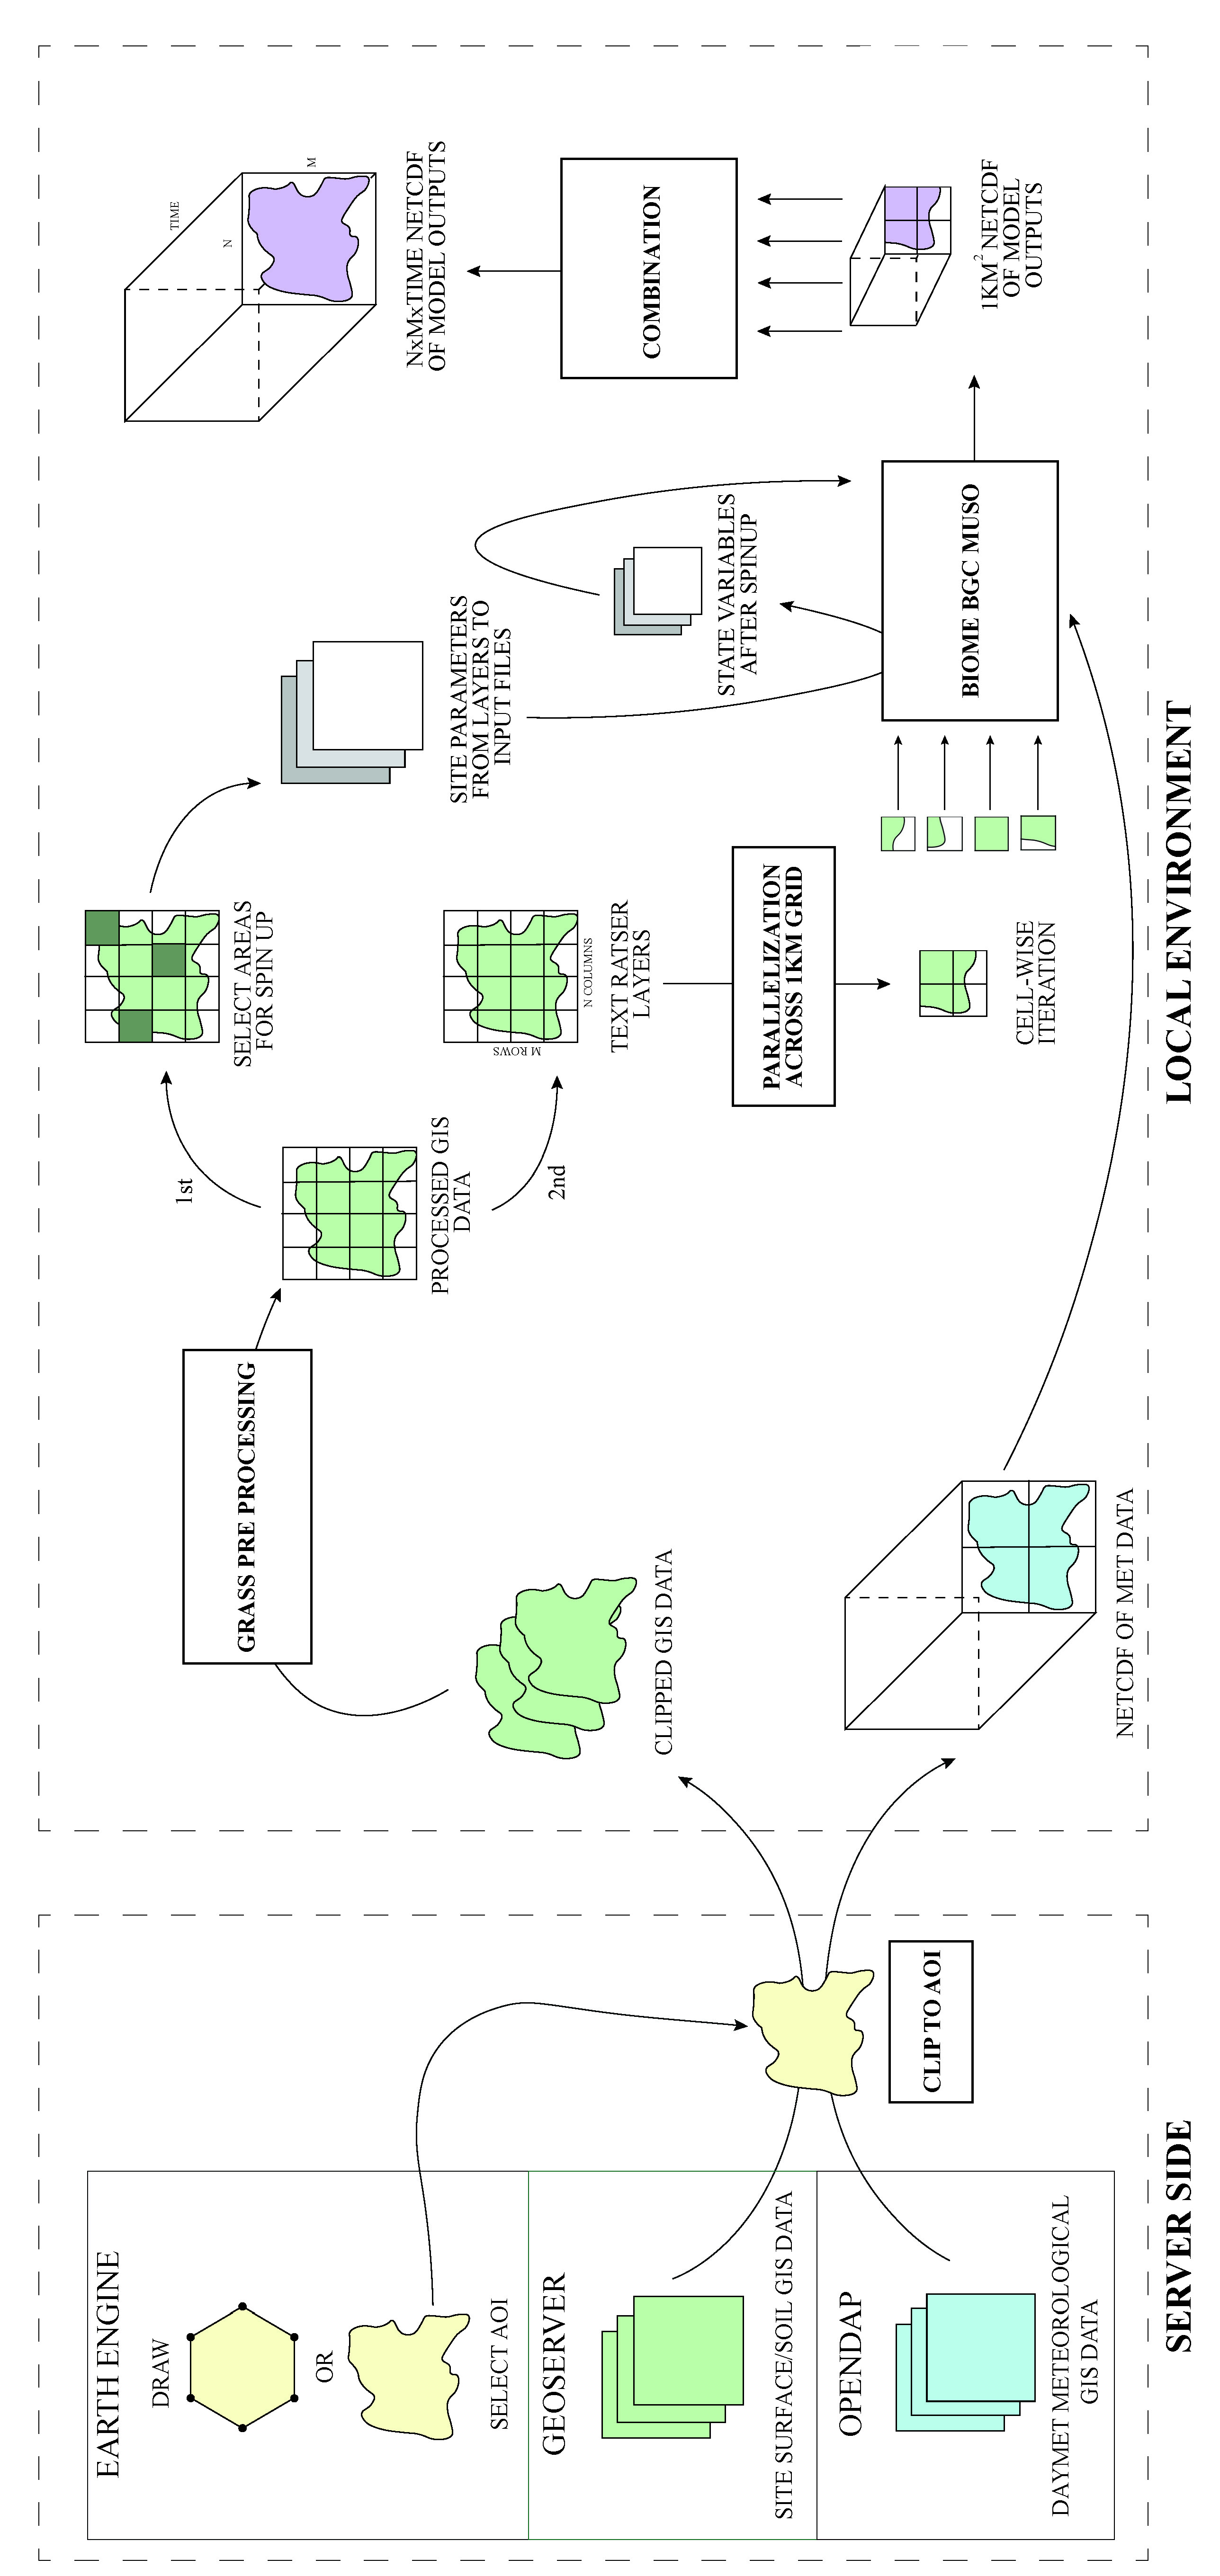

## How Do I Use This Model?

These notebooks are designed to walk users through the process of downloading data from multiple sources and call a wrapper function around Biome-BGC Muso iteratively for each cell in the defined area of interest.

Most of the work is already done for you. Your job is to walk through the notebooks, inputting information where requested as noted by the red alerts (see example below), and making sure there are no major errors that halt the progression of the model generation.

<div class="alert alert-block alert-danger">
<b> This is an example of an alert box that requests users to input specific information below </b>  </div>

## Create Model Directory

Creates a nest of directories relative to your current working directory. By doing so, a clean area to build the model and host all supporting files will be established. All model components created later will be built or imported within this directory.

Please not the location of:
- The primary model directory: {PROJECT_DIRECTORY}/{PROJECT_NAME}/model

Nested within this directory are the folders containing:
- Meteorological data downloaded and assembled from Daymet in Step 1_C: /met_data
- Raster input files downloaded throughout Step 1 and modified in Step 2_A: /raster_inputs
- Epc files downloaded in Step 2_B: /epc_files
- Model definition files created in Step 2_B: /defs
- Final model outputs: /Outputs
- Temporary outputs: /spinup and /normal

<div class="alert alert-block alert-danger">
<b> Project Name Setting: </b> Please set the Project Name and Cell Resolution for your project </div>

Below you will create a name for your project, set the current directory (of where the notebooks are saved on your machine), and set the spatial resolution you wish to run the model at. The native resolution of the data used is 30 meters, so this is the smallest resolution possible.

After setting this, copy the cell, since you will be pasting this at the top of every other notebook (Steps 2-9).

In [ ]:
# CHANGE PROJECT NAME HERE
PROJECT_NAME = 'Coweeta'

# CURRENT DIRECTORY HERE, SET WHERE THE NOTEBOOKS ARE LOCATED
CURRENT_DIRECTORY = ''

# SET THE SPATIAL RESOLUTION (in meters)
SPATIAL_RESOLUTION = 30

In [ ]:
import os, shutil
os.chdir(CURRENT_DIRECTORY)

In [ ]:
# Display Python version
!python --version

<div class="alert alert-block alert-info">
<b>Don't Change This Section </b> </div>

In [ ]:
#Set up folder system for model
PROJECT_DIR = os.path.join(CURRENT_DIRECTORY, PROJECT_NAME)
RAWGIS_DIR = os.path.join(PROJECT_DIR, "gis_data")
RAWOBS_DIR = os.path.join(PROJECT_DIR, "obs")
MODEL_DIR = os.path.join(PROJECT_DIR, 'model')
IMAGE = os.path.join(PROJECT_DIR, 'image_map')
# Create directories if directories are not previously setup.
if not os.path.exists(PROJECT_DIR):
    os.mkdir(PROJECT_DIR)
    os.mkdir(RAWGIS_DIR)
    os.mkdir(RAWOBS_DIR)
    os.mkdir(MODEL_DIR)
    os.mkdir(IMAGE)
    os.mkdir(os.path.join(MODEL_DIR, 'output'))
    os.mkdir(os.path.join(MODEL_DIR, 'raster_inputs'))
    os.mkdir(os.path.join(MODEL_DIR, 'epc_files'))
    os.mkdir(os.path.join(MODEL_DIR, 'met_data'))
    os.mkdir(os.path.join(MODEL_DIR, 'defs'))
    os.mkdir(os.path.join(MODEL_DIR, 'ini_files'))
    os.mkdir(os.path.join(MODEL_DIR, 'co2'))
    os.mkdir(os.path.join(MODEL_DIR, 'ndep'))
    os.mkdir(os.path.join(MODEL_DIR, 'endpoint_files'))
    os.mkdir(os.path.join(MODEL_DIR, 'spinup'))
    os.mkdir(os.path.join(MODEL_DIR, 'normal'))
    os.mkdir(os.path.join(MODEL_DIR, 'mgm_files'))
else:
    pass

In [ ]:
print(os.getcwd())

## Download BBGC Muso Source Code and Complie

Download Biome-BGC Muso version 6.2 from source. Following download, we extract the info saved in the .tar file and compile the source code using the "make" command.

In [ ]:
import requests

# Download source code as a .tar file
url = "http://nimbus.elte.hu/bbgc/files/biome-bgc-muso_6.2_Linux_src.tar"
target_path = "biome-bgc-muso_6.2_Linux_src.tar"
response = requests.get(url, stream=True, verify=False)
if response.status_code == 200:
    with open(target_path, 'wb') as f:
        f.write(response.raw.read())

In [ ]:
import tarfile

# Extract .tar file containing source code
my_tar = tarfile.open('biome-bgc-muso_6.2_Linux_src.tar')
my_tar.extractall(MODEL_DIR) # specify which folder to extract to
my_tar.close()

In [ ]:
# Compile source code
os.chdir(os.path.join(MODEL_DIR, "biome-bgc-muso_6.2_Linux_src"))
! make

In [ ]:
# Move BBGC executable to model directory created
shutil.move(os.path.join(MODEL_DIR, "biome-bgc-muso_6.2_Linux_src", "muso"), os.path.join(MODEL_DIR, "muso"))